## zfmlhw07

## 1. 阅读作业
阅读博客文章http://blog.csdn.net/baimafujinji/article/details/52928203 中关于Nearest neighbour search的部分。  
提交一张你阅读的界面截图。学习是自己的事情，请认真理解其中内容，切勿只截图而不阅读。

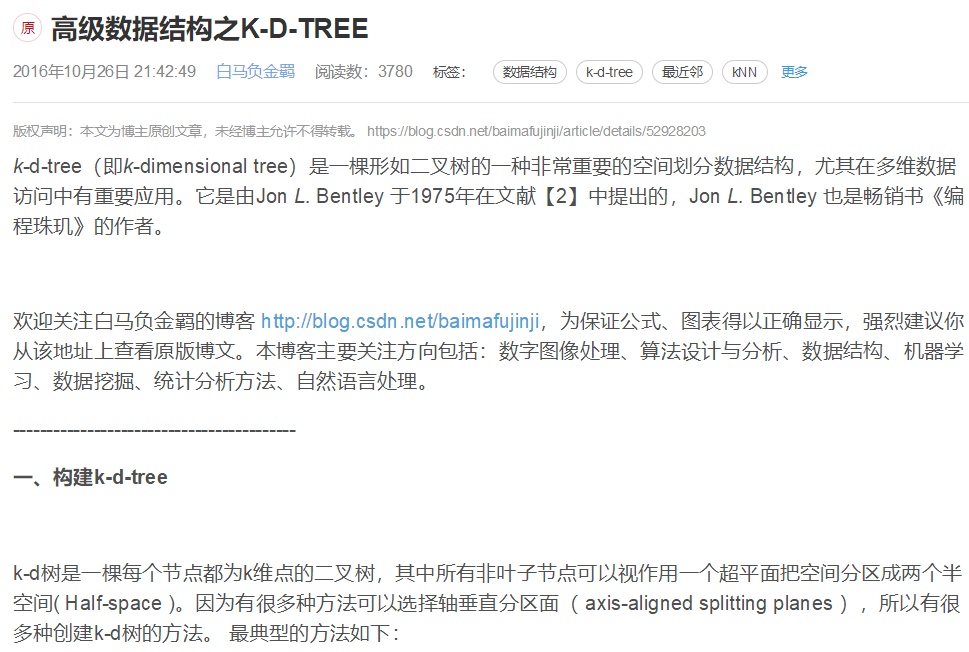

## 2. 数据分析作业
使用DBSCAN算法对之前作业中给出的countries_data数据进行聚类。  
具体要求和提示：  
1）用图形可视化地显示你的聚类效果，提交执行结果的截图。  
2）聚类属于非监督学习，载入数据时不应该有label。  
3）请使用Python或R。  
4）对于你调用的核心函数，选取至少三个参数列表中的参数，解释它们的含义。  
5）提交完整的（包括引用必要头文件所需的代码）可以执行的代码，代码部分请不要以截图方式提交，因为无法复制粘贴而不能运行的代码将无法判定正确与否。

如果你使用Python，那么你可以参考：  
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN 

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

/home/ian/installed/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
iris = datasets.load_iris() # 导入数据集
X = iris.data # 获得其特征向量
y = iris.target # 获得样本labe

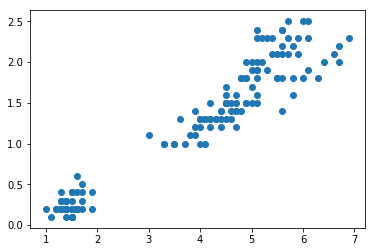

In [3]:
#取后两个特征
X1 = X[:, 2:]
plt.scatter(X1[:,0], X1[:, 1])

### DBSCAN(eps=0.5, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=1)

参数意义：
* eps：邻域半径
* min_samples:用于判断核心对象的最小样本数量
* metric: 计算距离的方法

In [8]:
model = DBSCAN(eps=0.4)
y_pred = model.fit_predict(X1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
color = ('red', 'blue')
colors = [color[i] for i in y_pred]

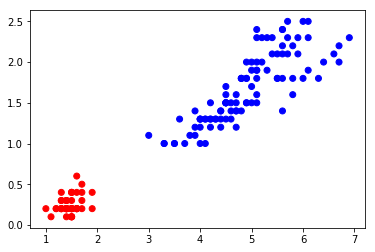

In [10]:
plt.scatter(X1[:,0], X1[:,1], color=colors)

## 3. 编程实践题
如果你已经完成了本次作业中的第1题，那么相信你对于利用KD-Tree来进行最近邻搜索已经非常熟悉了。本题将考察并锻炼你对于具体技术或算法细节的理解。


### Description
这天，SJY显得无聊。在家自己玩。在一个棋盘上，有N个黑色棋子。他每次要么放到棋盘上一个黑色棋子，要么放上一个白色棋子，如果是白色棋子，他会找出距离这个白色棋子最近的黑色棋子。此处的距离是 曼哈顿距离 即(|x1-x2|+|y1-y2|) 。现在给出N<=500000个初始棋子。和M<=500000个操作。对于每个白色棋子，输出距离这个白色棋子最近的黑色棋子的距离。同一个格子可能有多个棋子。
 
### Input说明
第一行两个数 N M  
以后M行，每行3个数 t x y
如果t=1 那么放下一个黑色棋子
如果t=2 那么放下一个白色棋子
Output说明
对于每个T=2 输出一个最小距离
 
Sample Input  
2 3  
1 1  
2 3  
2 1 2   
1 3 3  
2 4 2  

红色字体表示棋盘上原有的N个黑色棋子。

注意：你可以把Input的内容存入一个文本文件中，然后通过读取文件的方法来获取输入的内容，这样你便可以静态地创建KD-Tree了。当然，你也可以尝试动态创建KD-Tree的方法，我们对此不做要求，原则上你只要能够静态地实现KD-Tree并进行NN搜索即已满足要求。
Sample Output

1  
2


现在要求你编程解决上述问题。具体要求如下，不遵守如下题目要求，可能会被红牌扣罚：  
1）你只能使用Python或者R  
2）你必须自行编程实现KD-Tree来解决这个问题，暴力搜索或者调用现成的包都是不被允许的  
3）提交完整的（包括引用必要头文件所需的代码）可以执行的代码，代码部分请不要以截图方式提交，因为无法复制粘贴而不能运行的代码将无法判定正确与否。  
4）自行测试你的程序，提交程序输出的截图。

In [30]:
import numpy as np
import math

In [12]:
#a1用于记录已有的黑色棋子的位置
a1 = np.array([[1,1],[2,3]])

In [44]:
class KD_node:  
    def __init__(self, point=None, split=None, LL = None, RR = None):  
        """ 
        point:数据点 
        split:划分域 
        LL, RR:节点的左儿子跟右儿子 
        """  
        self.point = point  
        self.split = split  
        self.left = LL  
        self.right = RR
        
def createKDTree(root, data_list):  
    """ 
    root:当前树的根节点 
    data_list:数据点的集合(无序) 
    return:构造的KDTree的树根 
    """  
    LEN = len(data_list)  
    if LEN == 0:  
        return  
    #数据点的维度  
    dimension = len(data_list[0])  
    #方差  
    max_var = 0  
    #最后选择的划分域  
    split = 0;  
    for i in range(dimension):  
        ll = []  
        for t in data_list:  
            ll.append(t[i])  
        var = computeVariance(ll)  
        if var > max_var:  
            max_var = var  
            split = i  
    #根据划分域的数据对数据点进行排序  
    data_list.sort(key=lambda x: x[split])  
    #选择下标为len / 2的点作为分割点  
    point = (data_list[LEN // 2])  
    root = KD_node(point, split)  
    root.left = createKDTree(root.left, data_list[0:(LEN // 2)])  
    root.right = createKDTree(root.right, data_list[(LEN // 2 + 1):LEN])  
    return root  
  
def computeVariance(arrayList):  
    """ 
    arrayList:存放的数据点 
    return:返回数据点的方差 
    """  
    for ele in arrayList:  
        ele = float(ele)  
    LEN = len(arrayList)  
    array = np.array(arrayList)  
    sum1 = array.sum()  
    array2 = array * array  
    sum2 = array2.sum()  
    mean = sum1 / LEN  
    #D[X] = E[x^2] - (E[x])^2  
    variance = sum2 / LEN - mean**2  
    return variance  
def findNN(root, query):  
    """ 
    root:KDTree的树根 
    query:查询点 
    return:返回距离data最近的点NN，同时返回最短距离min_dist 
    """  
    #初始化为root的节点  
    NN = root.point  
    min_dist = computeDist(query, NN)  
    nodeList = []  
    temp_root = root  
    ##二分查找建立路径  
    while temp_root:  
        nodeList.append(temp_root)  
        dd = computeDist(query, temp_root.point)  
        if min_dist > dd:  
            NN = temp_root.point  
            min_dist = dd  
        #当前节点的划分域  
        ss = temp_root.split  
        if query[ss] <= temp_root.point[ss]:  
            temp_root = temp_root.left  
        else:  
            temp_root = temp_root.right  
    ##回溯查找  
    while nodeList:  
        #使用list模拟栈，后进先出  
        back_point = nodeList.pop()  
        ss = back_point.split  
#         print ("back.point = ", back_point.point ) 
        ##判断是否需要进入父亲节点的子空间进行搜索  
        if abs(query[ss] - back_point.point[ss]) < min_dist:  
            if query[ss] <= back_point.point[ss]:  
                temp_root = back_point.right  
            else:  
                temp_root = back_point.left  
  
            if temp_root:  
                nodeList.append(temp_root)  
                curDist = computeDist(query, temp_root.point)  
                if min_dist > curDist:  
                    min_dist = curDist  
                    NN = temp_root.point  
    return NN, min_dist  
  
def computeDist(pt1, pt2):  
    """ 
    计算两个数据点的距离 
    return:pt1和pt2之间的距离 
    """  
    sum = 0.0  
    for i in range(len(pt1)):  
        sum = sum + abs(pt1[i] - pt2[i])  
    return sum 

In [53]:
#处理输入的函数
def handle(a1,t,x,y):
    if t == 1:
        #如果t=1 那么放下一个黑色棋子 
        a1 = np.vstack((a1,np.array([[x,y]])))
        print('位置({},{})放下一颗黑子'.format(x,y))
    elif t ==2 :
        #如果t=2 那么放下一个白色棋子, 输出一个最小距离
        root = createKDTree(None,a1.tolist())
        p,dis = findNN(root,[x,y])
        print('位置({},{})放下一颗白子,最近的一颗黑子为({},{}),距离{}'.format(x,y,p[0],p[1],dis))
    return a1

In [54]:
a1 = handle(a1,2,1,2)

位置(1,2)放下一颗白子,最近的一颗黑子为(1,1),距离1.0


In [55]:
a1 = handle(a1,1,3,3)

位置(3,3)放下一颗黑子


In [56]:
a1 = handle(a1,2,4,2)

位置(4,2)放下一颗白子,最近的一颗黑子为(3,3),距离2.0


In [57]:
a1 = handle(a1,2,3,5)

位置(3,5)放下一颗白子,最近的一颗黑子为(3,3),距离2.0


In [58]:
a1 = handle(a1,2,7,35)

位置(7,35)放下一颗白子,最近的一颗黑子为(3,3),距离36.0


In [59]:
a1 = handle(a1,1,7,35)

位置(7,35)放下一颗黑子


In [60]:
a1 = handle(a1,1,5,25)

位置(5,25)放下一颗黑子


In [61]:
a1 = handle(a1,2,2,15)

位置(2,15)放下一颗白子,最近的一颗黑子为(2,3),距离12.0


## end

## end

## end

## end

## end

## end

## end

## end

## end